# **PREDICTING THE SENTIMENTS OF TWEETS USING MACHINE LEARNING**

**TABLE OF CONTENT**

>[Load the data](#scrollTo=tU20oOfA0fxB)

>[Exploratory Data Analysis](#scrollTo=qvh5VNwI2ah4)

>>[2.1. Visualize the Distribution of the Target Variable](#scrollTo=d3XW69Xx3DFx)

>>[2.2. Generate a Word Cloud](#scrollTo=7heUuDGO3Omy)

>>[2.3. Check for missing values](#scrollTo=64IjaIKX3dYm)

>>[2.4. Visualize Text Length Distribution](#scrollTo=BdOOsYzk3gEY)

>>[2.5. EDA Insights](#scrollTo=dyU5t3xN7vCp)

>[Data Preprocessing](#scrollTo=B-8jw4bH78U_)

>[Model Building](#scrollTo=fUG9pxICICSJ)

>>[4.1. Logistic Regression](#scrollTo=cZeb5DBNNMKM)

>>[4.2. Naive Bayes](#scrollTo=F4RdXN32NYm5)

>>[4.3. Linear Support Vector Machine](#scrollTo=YHolrJRsNcBu)

>>[4.4. Random Forest](#scrollTo=HmW8NQl0NgOU)

>>[4.5 SGD Classifier with logistic regression setting](#scrollTo=pajlmNOCrdEn)

>>[4.6. ANN](#scrollTo=bOccLJvoeYQa)

>>[4.7. VADER Lexicon](#scrollTo=3EMdKtMxNgBw)

>[Model Evaluation](#scrollTo=WphXuwSnTN5s)

>[Model Optimization](#scrollTo=7l_8awzQYHii)

>[Sentiment Predictions](#scrollTo=DxQu040NFUyd)

>[Conclusion](#scrollTo=WxEFr6Ku7vrG)



#1. Load the data

In this section we will:
- Connect to Kaggle using an API and download the dataset.
- Import necessary libraries for the project.
- Load the dataset into a pandas DataFrame to examine its structure.
- Identify columns and data types, the target variable and the features available for prediction.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 94% 76.0M/80.9M [00:00<00:00, 101MB/s]
100% 80.9M/80.9M [00:00<00:00, 104MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
from wordcloud import WordCloud

In [ ]:
# Creating the dataframe
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = ('ISO-8859-1'), names=['label', 'tweet_id', 'timestamp', 'query', 'user_id', 'text'])

In [ ]:
# Replace the values of positive sentiment from 4 to 1
data['label'] = data['label'].replace(4,1)

In [ ]:
# Display the first 5 rows of the 'data' DataFrame
data.head(5)

,label,tweet_id,timestamp,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


The dataset has been successfully loaded, and it consists of six columns. Based on the initial examination, here's a brief overview:

- label: Appears to be the target variable with integer values, likely indicating sentiment (e.g., 0 for negative, 1 for positive).
- tweet_id: Contains the tweet ID (also an integer).
- timestamp: Contains timestamps in a readable format.
- query: Has a constant value "NO_QUERY"; its purpose is unclear with only a reference to the presence of query (Lyx). However, it does not seem relevant for sentiment analysis.
- user_id: Contains usernames.
- text: Contains the text data (tweet), which is what we're most interested in for sentiment analysis.

*The data types are as follows:*

Integer for columns label and tweet_id, and object (string) for columns timestamp to user_id.
Given this structure, our target variable for sentiment analysis is in Column label, and the feature available for prediction is the text data in Column text.

#2. Exploratory Data Analysis

1. Visualize the Distribution of the Target Variable: This helps us assess the balance or imbalance of sentiment within our dataset.
2. Explore Text Data: Identify common words and phrases to understand the general sentiment and topics by generating word clouds.
3. Handle Missing Values: Check for and handle any missing values in the dataset, especially in the text data and the target variable.
4. Visualize Text Length Distribution: Understanding the length of the tweets might give insights into the dataset's characteristics.



##2.1. Visualize the Distribution of the Target Variable

Balanced vs. Unbalanced: If the counts for each sentiment category are roughly equal, the dataset is balanced. This is ideal for training models. However, if one category dominates, the dataset would be unbalanced and we would need strategies to handle it, such as oversampling, undersampling, or using weighted loss functions during model training.

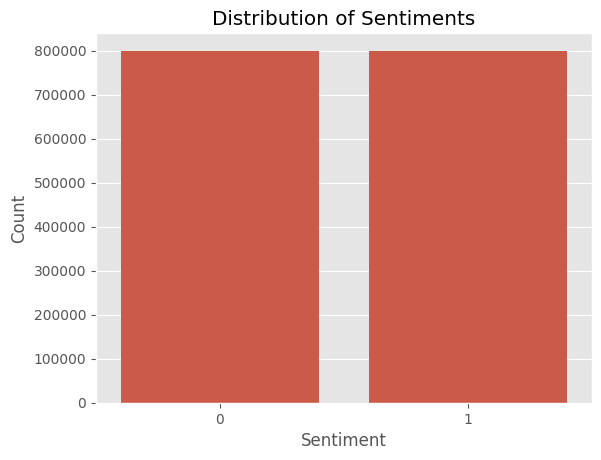

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and column label is the target variable
sns.countplot(x=data['label'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##2.2. Generate a Word Cloud

Common Words and Themes: A word cloud will visually emphasize the most common words in our dataset. Frequent words that are not stop words can give us insights into the common themes in the text data. If certain words are overly dominant, it may indicate common phrases or topics specific to the dataset's context.

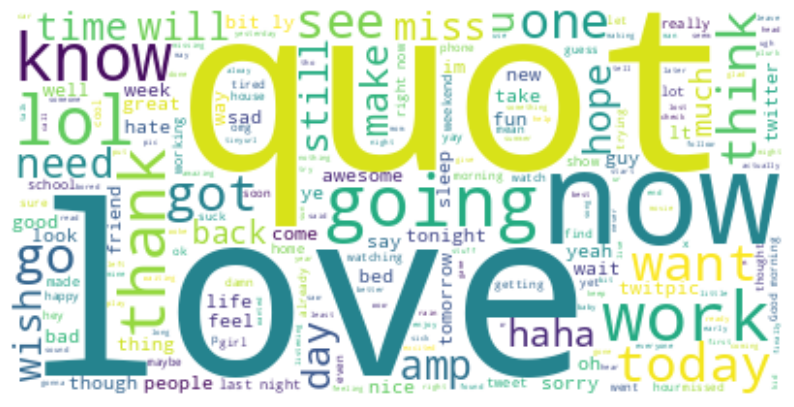

In [ ]:
from wordcloud import WordCloud

# Combine all text data into a single string
text = " ".join(review for review in data['text'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##2.3. Check for missing values

Handling Missing Data: If certain columns, especially the text data or target variable, have missing values, we will need to decide how to handle them. Common strategies include removing rows with missing values or applying imputation techniques based on the data distribution.

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

label        0
tweet_id     0
timestamp    0
query        0
user_id      0
text         0
dtype: int64


##2.4. Visualize Text Length Distribution

Insights from Text Length:
- Mean and Median: These measures give us an idea of the average length of text in our dataset. A large difference between the mean and median may indicate outliers or a skewed distribution.
- Min and Max: The minimum and maximum lengths can highlight if any texts are unusually short or long, which could be labeled as outliers or errors.
- Standard Deviation: A high standard deviation indicates a wide range of text length, while a low standard deviation suggests that most texts are of similar length.

In [ ]:
# Calculate text length statistics for each tweet
text_length_stats = data.iloc[:, 5].apply(len).describe()
print(text_length_stats)

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text, dtype: float64


##2.5. EDA Insights

1. Sentiment Distribution:
  - The distribution of sentiments is balanced with two distinct classes, indicating positive and negative sentiments.
  - Each class has roughly the same number of entries, suggesting that the dataset is well-suited for training classification models without the need for sampling techniques to address class imbalance.

2. Missing Values:
  - There are no missing values in any of the columns, which means there is no need for imputation or removal of missing data.

3. Word Cloud:
  - The word cloud suggests a mix of positive and negative words, with positive words like "love," "thank," and "good" appearing prominently, as well as negative words such as "miss" and "hate."
  - Common terms related to social media interactions like "twitter," "twitpic", and "facebook" are also visible, which is expected given the context of the data.
  - Words related to daily life and personal experiences, such as "work", "going", "today", "back", and "time", indicate the personal nature of the text content.

4. Text Length Statistics:
  - The average length of a text entry is around 74 characters, with a standard deviation of about 36 characters, suggesting moderate variance in text length.
  - The minimum text length is very short at only 6 characters, and the maximum length is 374 characters, which is close to the historical 280-character limit of Twitter, suggesting that the text data is sourced from a platform with a character limit.
  - The 25th percentile is at 44 characters, the median (50th percentile) is at 69 characters, and the 75th percentile is at 104 characters, indicating a right-skewed distribution where most texts are shorter rather than longer.

#3. Data Preprocessing

Data preprocessing involves cleaning and preparing the text data for modeling. Here's what we'll do for the data preprocessing step:

- Define emojis and chat words dictionaries: Emojis and chat words dictionaries will be used in the preprocessing functions.
- Remove User Mentions and Hashtags: User mentions (e.g., "@username") and hashtags (e.g., "#example") are common in social media data but do not contribute to the analysis.
- Replace Emojis: Emojis can convey sentiments or emotions, but they can be challenging for machine learning models to interpret directly, therefore we are going to replace them with the word of the sentiment they represent.
- Replace Chatwords: Chatwords or internet slangs (e.g., "lol", "brb") may not be recognized by standard language processing tools.
- Remove Punctuation: Punctuation marks such as periods, commas, and exclamation points may not carry significant meaning for some tasks and can be removed from the text using string manipulation functions or regular expressions.
- Remove Stopwords: Stopwords are common words like "the", "is", "and", etc., that occur frequently in text but often do not contribute much to the overall meaning.
- Remove URL: URLs often appear in text data but may not be relevant to the analysis.
- Lemmatization: Reduce words to their root form. Lemmatization is typically more useful than Stemming as it converts words to their meaningful base form.
- Vectorization: Convert text to a numerical format that machine learning models can understand using TF-IDF vectorization.
- Split the Data: Divide the dataset into training (80%) and testing (20%) sets.

In [ ]:
# Import all necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Pre-defined replacements dictionaries
# Define our emojis dictionary
emojis_dict = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
# Define our chat words dictionary
chat_words_dict = {"BRB": "Be right back",
        "BTW": "By the way",
        "OMG": "Oh my God/goodness",
        "TTYL": "Talk to you later",
        "OMW": "On my way",
        "SMH/SMDH": "Shaking my head/shaking my darn head",
        "LOL": "Laugh out loud",
        "TBD": "To be determined",
        "IMHO/IMO": "In my humble opinion",
        "HMU": "Hit me up",
        "IIRC": "If I remember correctly",
        "LMK": "Let me know",
        "OG": "Original gangsters (used for old friends)",
        "FTW": "For the win",
        "NVM": "Nevermind",
        "OOTD": "Outfit of the day",
        "Ngl": "Not gonna lie",
        "Rq": "real quick",
        "Iykyk": "If you know, you know",
        "Ong": "On god (I swear)",
        "YAAAS": "Yes!",
        "Brt": "Be right there",
        "Sm": "So much",
        "Ig": "I guess",
        "Wya": "Where you at",
        "Istg": "I swear to god",
        "Hbu": "How about you",
        "Atm": "At the moment",
        "Asap": "As soon as possible",
        "Fyi": "For your information"}

In [ ]:
# Initialize stopwords and lemmatizer
stop_words_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Cleaning functions
# Remove user mentions and hashtags using regular expression
def remove_user_hashtag(text):
    return re.sub(r'@[^ ]+|#[^ ]+', '', text)

# Replace emojis in the text with their corresponding words based on the provided dictionary of emojis
def replace_emojis(text, emojis):
    for emoji, word in emojis.items():
        text = text.replace(emoji, " " + word)
    return text

# Replace commonly used chat words based on the provided dictionary of chat_words and using regular expression
def replace_chat_words(text, chat_words):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in chat_words.keys()) + r')\b')
    return pattern.sub(lambda x: chat_words[x.group()], text)

# Remove punctuation marks using regular expression
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Remove stopwords, improving text analysis by eliminating common words that carry little meaning
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words_set)

# Remove URLs using regular expression
def remove_urls(text):
    return re.sub(r'https\S+www\S+https\s+|http\S+', '', text, flags=re.MULTILINE)

# Apply lemmatization to normalize words for better text analysis and understanding
def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

In [ ]:
# Apply all cleaning operations
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(remove_user_hashtag)
data['text'] = data['text'].apply(replace_emojis, emojis=emojis_dict)
data['text'] = data['text'].apply(replace_chat_words, chat_words=chat_words_dict)
data['text'] = data['text'].apply(remove_punctuation)
data['text'] = data['text'].apply(remove_stopwords)
data['text'] = data['text'].apply(remove_urls)
data['text'] = data['text'].apply(lemmatize_text)

In [ ]:
# Vectorize the cleaned text using TF-IDF with range of unigrams and bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
# Fit and transform the text data from the 'text' column to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

In [ ]:
# Display the first 5 rows of the 'data' DataFrame
data.head(5)

,label,tweet_id,timestamp,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww thats bummer shoulda got david carr third...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many time ball managed save 50 rest go b...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see


In [ ]:
# Import the train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Transform the training and testing data using TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now X_train_tfidf and y_train are ready for training a model
# X_test_tfidf and y_test are ready for evaluating the model

In [ ]:
# Print the training set (X_train)
print(X_train)

1374558    ya quotid like palm pre touchstone charger rea...
1389115            felt earthquake afternoon seems epicenter
1137831                              ruffle shirt like likey
790714     pretty bad night crappy morningfml buttface di...
1117911                                      yeah clear view
                                 ...                        
259178           song middle change doesnt want born arghhhh
1414414                                            good luck
131932                                  rather average 32370
671155     pickin waitin 2 hurry upi odeeee missed dem ta...
121958           home studying math wooot im going fail shit
Name: text, Length: 1280000, dtype: object


In [ ]:
# Print the TF-IDF transformed training set (X_train)
print(X_train_tfidf)

  (0, 7889)	0.32759188479929857
  (0, 6419)	0.3881024484093551
  (0, 6975)	0.23219669623753672
  (0, 817)	0.2983772470114568
  (0, 3404)	0.1580710558788188
  (0, 7886)	0.23792021565974972
  (0, 9897)	0.22032446174285752
  (0, 1368)	0.35888014944935853
  (0, 6754)	0.354414612666464
  (0, 6418)	0.35630263164197423
  (0, 5041)	0.1629924406244058
  (0, 9837)	0.2470984070163691
  (1, 7488)	0.43581051660455133
  (1, 264)	0.4503070821100366
  (1, 2373)	0.6076059840506352
  (1, 2755)	0.4879627993651548
  (2, 5116)	0.7614867304087967
  (2, 7575)	0.5723020639477514
  (2, 5041)	0.3043161300563355
  (3, 9720)	0.2757552057768895
  (3, 3308)	0.27027100109251867
  (3, 1677)	0.2884690496313551
  (3, 2076)	0.35138251333320425
  (3, 706)	0.3735859965788796
  (3, 6776)	0.35844186297480496
  :	:
  (1279995, 7819)	0.31507560516421473
  (1279995, 2165)	0.312677561648564
  (1279995, 9308)	0.2438710963866264
  (1279996, 3436)	0.6774704164303754
  (1279996, 5376)	0.6225077144011072
  (1279996, 3404)	0.39181370

In [ ]:
# Print the TF-IDF transformed testing set (X_test)
print(X_test_tfidf)

  (0, 6244)	0.39157176388928117
  (0, 4076)	0.6834473842592044
  (0, 4051)	0.3356907022110344
  (0, 285)	0.516607180673044
  (1, 8997)	0.4755417639171685
  (1, 1646)	0.4904283171726418
  (1, 498)	0.730301373739471
  (2, 9526)	0.2708286181491824
  (2, 8671)	0.14844818319071082
  (2, 7721)	0.3247175171659523
  (2, 6025)	0.26305831815570174
  (2, 6015)	0.19090953103704622
  (2, 5041)	0.14102664524412695
  (2, 4786)	0.15460152338848943
  (2, 4757)	0.32031702735679873
  (2, 4236)	0.3444685605898666
  (2, 4231)	0.17253097028228664
  (2, 3752)	0.25045405921610386
  (2, 3683)	0.34842518073749756
  (2, 3679)	0.18951942473126865
  (2, 2655)	0.2206786185152004
  (2, 2285)	0.2897145212969884
  (2, 1192)	0.2145465517628846
  (3, 9654)	0.2569382393347954
  (3, 8159)	0.29430901053404335
  :	:
  (319995, 1289)	0.7047842902355761
  (319996, 9447)	0.27743538836210824
  (319996, 7586)	0.3972063664346306
  (319996, 6564)	0.5101439466307142
  (319996, 6563)	0.3439417673595507
  (319996, 1164)	0.52249824726

#4. Model Building

In this section, we will build and compare seven models to determine the most effective predictor of tweet sentiments.

The first six models will be supervised, meaning they will be trained using labeled data, where each tweet is associated with a sentiment label.

The seventh model will be unsupervised, meaning it does not rely on labeled data. Instead, it analyzes the structure and patterns within the data to identify sentiment clusters or themes without explicit supervision.

Supervised models:
- Logistic Regression: Versatile model for binary classification, it's a good starting point for text sentiment analysis.
- Naive Bayes: Probabilistic model, often performs well in text classification due to its assumption of independence among features.
- Linear Support Vector Machine (SVC): Classification algorithm efficient for linearly separable data in high-dimensional spaces.
- Random Forest: An ensemble method that can capture non-linear patterns by combining decision trees.
- Stochastic Gradient Descent Classifier (SGDC) with Logistic Regression: SGDC is an efficient optimization algorithm used to train logistic regression models.
- Artificial Neural Network (ANN): A versatile model inspired by the human brain's structure and capable of capturing intricate patterns in text.

Unsupervised model:
- VADER: Stands for "Valence Aware Dictionary and sEntiment Reasoner". Lexicon and rule-based sentiment analysis tool, suitable for sentiment analysis on social media text.

For each model, we'll:

- Instantiate the model.
- Train it on the training set.
- Predict sentiments on the test set.

We'll use the preprocessed and vectorized data X_train_tfidf, X_test_tfidf, y_train, and y_test from the previous section.

In [ ]:
# Import the selected machine learning models for the project, and evaluation metrics like accuracy score and classification report.
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

##4.1. Logistic Regression

In [ ]:
# Logistic Regression
# Instantiate the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train_tfidf, y_train)

# Predict on the test set
logreg_pred = logreg.predict(X_test_tfidf)

# Calculate performance metrics
print("Logistic Regression Model Performance metrics:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, logreg_pred):.4f}")
print(f"Precision: {precision_score(y_test, logreg_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, logreg_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, logreg_pred, average='weighted'):.4f}")
print()

# Detailed classification report
print("Model Classification report:")
print("-" * 30)
print(classification_report(y_test, logreg_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Performance metrics:
------------------------------
Accuracy: 0.7844
Precision: 0.7849
Recall: 0.7844
F1 Score: 0.7843

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           1       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



##4.2. Naive Bayes

In [ ]:
# Naive Bayes
# Instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

# Train the model
nb.fit(X_train_tfidf, y_train)

# Predict on the test set
nb_pred = nb.predict(X_test_tfidf)

# Calculate performance metrics
print("Naive Bayes Model Performance metrics:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, nb_pred):.4f}")
print(f"Precision: {precision_score(y_test, nb_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, nb_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, nb_pred, average='weighted'):.4f}")
print()

# Detailed classification report
print("Model Classification report:")
print("-" * 30)
print(classification_report(y_test, nb_pred))

Naive Bayes Model Performance metrics:
------------------------------
Accuracy: 0.7670
Precision: 0.7670
Recall: 0.7670
F1 Score: 0.7670

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.77      0.77    159494
           1       0.77      0.76      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



##4.3. Linear Support Vector Machine

In [ ]:
# Linear Support Vector Machine
# Instantiate a Linear Support Vector Machine model
svm_model = LinearSVC(random_state=42)

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
svm_pred = svm_model.predict(X_test_tfidf)

# Calculate performance metrics
print("LinearSVC Model Performance metrics:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, svm_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, svm_pred, average='weighted'):.4f}")
print()

# Detailed classification report
print("Model Classification report:")
print("-" * 30)
print(classification_report(y_test, svm_pred))

LinearSVC Model Performance metrics:
------------------------------
Accuracy: 0.7836
Precision: 0.7844
Recall: 0.7836
F1 Score: 0.7834

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           1       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



##4.4. Random Forest

In [ ]:
# Random Forest
# Instantiate a Random Forest model
rf_model = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

# Train the model
rf_model.fit(X_train_tfidf, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test_tfidf)

# Calculate performance metrics
print("RandomForest Model Performance metrics:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_pred, average='weighted'):.4f}")
print()

# Detailed classification report
print("Model Classification report:")
print("-" * 30)
print(classification_report(y_test, rf_pred))

RandomForest Model Performance metrics:
------------------------------
Accuracy: 0.7071
Precision: 0.7178
Recall: 0.7071
F1 Score: 0.7033

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.77      0.59      0.67    159494
           1       0.67      0.82      0.74    160506

    accuracy                           0.71    320000
   macro avg       0.72      0.71      0.70    320000
weighted avg       0.72      0.71      0.70    320000



##4.5 SGD Classifier with logistic regression setting

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Configure the SGDClassifier for Logistic Regression
clf = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)

# Train the model
clf.fit(X_train_tfidf, y_train)

# Predict on the test set
sgdc_pred = clf.predict(X_test_tfidf)

# Calculate performance metrics
print("SGDClassifier Model Performance metrics:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, sgdc_pred):.4f}")
print(f"Precision: {precision_score(y_test, sgdc_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, sgdc_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, sgdc_pred, average='weighted'):.4f}")
print()

# Detailed classification report
print("Model Classification report:")
print("-" * 30)
print(classification_report(y_test, sgdc_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier Model Performance metrics:
------------------------------
Accuracy: 0.7643
Precision: 0.7649
Recall: 0.7643
F1 Score: 0.7642

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.78      0.74      0.76    159494
           1       0.75      0.79      0.77    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



##4.6. ANN

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Adjusting the model to potentially train faster
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),  # Using a single hidden layer with fewer neurons
    max_iter=50,  # Reduce the number of iterations
    activation='relu',
    solver='adam',  # Consider trying 'sgd' with a well-chosen learning rate for potentially faster training
    batch_size=128,  # Increased batch size for faster epoch processing
    early_stopping=True,  # Enable early stopping
    n_iter_no_change=5,  # Number of iterations with no improvement to wait before stopping the training
    random_state=42,
    verbose=True
)

In [ ]:
# Train the model
mlp.fit(X_train_tfidf, y_train)

Iteration 1, loss = 0.46832794
Validation score: 0.783500
Iteration 2, loss = 0.45114134
Validation score: 0.785867
Iteration 3, loss = 0.44596876
Validation score: 0.787695
Iteration 4, loss = 0.44106197
Validation score: 0.787977
Iteration 5, loss = 0.43528435
Validation score: 0.788141
Iteration 6, loss = 0.42863386
Validation score: 0.788547
Iteration 7, loss = 0.42111257
Validation score: 0.787898
Iteration 8, loss = 0.41305090
Validation score: 0.786586
Iteration 9, loss = 0.40409796
Validation score: 0.785109
Iteration 10, loss = 0.39465444
Validation score: 0.783648
Iteration 11, loss = 0.38463568
Validation score: 0.781359
Iteration 12, loss = 0.37453264
Validation score: 0.779234
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(50,),
              max_iter=50, n_iter_no_change=5, random_state=42, verbose=True)

In [ ]:
# Predict on the test set
y_pred = mlp.predict(X_test_tfidf)

# Calculate performance metrics
print("ANN Model Performance metrics:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print()

# Detailed classification report
print("Model Classification report:")
print("-" * 30)
print(classification_report(y_test, y_pred))

ANN Model Performance metrics:
------------------------------
Accuracy: 0.7884
Precision: 0.7885
Recall: 0.7884
F1 Score: 0.7884

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.79      0.78      0.79    159494
           1       0.79      0.79      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



##4.7. VADER Lexicon

In [ ]:
# Download the VADER lexicon from NLTK
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Import the SentimentIntensityAnalyzer class from NLTK's VADER module
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
'''
Perform sentiment analysis using VADER lexicon on text data stored in a DataFrame.

    Parameters:
        data (DataFrame): DataFrame containing the text data.
        text_column (str): Name of the column containing the text data. Default is 'text'.
        threshold (float): Threshold value used to determine final sentiment. Default is 0.1.
        verbose (bool): Whether to display detailed sentiment statistics. Default is False.
'''
def analyze_sentiment_vader_lexicon(data, text_column='text', threshold=0.1, verbose=False):

    # Analyze sentiment for each text
    sentiments = []
    for text in data[text_column]:
        scores = analyzer.polarity_scores(text)  # Assuming 'analyzer' is already defined outside this function
        agg_score = scores['compound']
        final_sentiment = 'positive' if agg_score >= threshold else 'negative'
        sentiments.append(final_sentiment)

    # Add 'sentiment' column to DataFrame
    data['sentiment'] = sentiments

    # Display detailed sentiment statistics if verbose is True
    if verbose:
        sentiment_stats = []
        for text in data[text_column]:
            scores = analyzer.polarity_scores(text)  # Assuming 'analyzer' is already defined outside this function
            positive = round(scores['pos'] * 100, 2)
            negative = round(scores['neg'] * 100, 2)
            sentiment_stats.append((positive, negative))

        sentiment_stats_df = pd.DataFrame(sentiment_stats, columns=['Positive', 'Negative'])
        data = pd.concat([data, sentiment_stats_df], axis=1)

    return data

In [ ]:
# Predict sentiment for each text in the DataFrame using VADER lexicon with custom threshold
predicted_sentiments = analyze_sentiment_vader_lexicon(data, text_column='text', threshold=0.4, verbose=False)

In [ ]:
#Extract sentiment labels from the dataframe
test_sentiments = data['label']

# Convert sentiment labels to match the format (0 for negative, 1 for positive)
predicted_sentiments['predicted_label'] = predicted_sentiments['sentiment'].map({'negative': 0, 'positive': 1})

In [ ]:
# Set up variables vader_pred and y_vtest for convenience
vader_pred = predicted_sentiments['predicted_label']
y_vtest = test_sentiments

# Calculate performance metrics
print("VADER Model Performance metrics:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_vtest, vader_pred):.4f}")
print(f"Precision: {precision_score(y_vtest, vader_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_vtest, vader_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_vtest, vader_pred, average='weighted'):.4f}")
print()

# Detailed classification report
print("Model Classification report:")
print("-" * 30)
print(classification_report(y_vtest, vader_pred))

VADER Model Performance metrics:
------------------------------
Accuracy: 0.6438
Precision: 0.6575
Recall: 0.6438
F1 Score: 0.6358

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.61      0.79      0.69    800000
           1       0.70      0.50      0.58    800000

    accuracy                           0.64   1600000
   macro avg       0.66      0.64      0.64   1600000
weighted avg       0.66      0.64      0.64   1600000



#5. Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary to hold the performance metrics
model_performance = {}

# List of model predictions for iteration
predictions = [
    ('Logistic Regression', logreg_pred),
    ('Naive Bayes', nb_pred),
    ('LinearSVC', svm_pred),
    ('Random Forest', rf_pred),
    ('SGDC Classifier', sgdc_pred),
    ('Artificial Neural Network', y_pred)
    ]

# Calculate metrics for each model
for model_name, model_pred in predictions:
    model_performance[model_name] = {
        'Accuracy': accuracy_score(y_test, model_pred),
        'Precision': precision_score(y_test, model_pred, average='weighted'),
        'Recall': recall_score(y_test, model_pred, average='weighted'),
        'F1 Score': f1_score(y_test, model_pred, average='weighted')
    }

# Convert the dictionary to a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance).T
performance_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.784391,0.784939,0.784391,0.784266
Naive Bayes,0.766969,0.767007,0.766969,0.766966
LinearSVC,0.783559,0.784363,0.783559,0.783381
Random Forest,0.707125,0.717806,0.707125,0.703316
SGDC Classifier,0.764334,0.764896,0.764334,0.764184
Artificial Neural Network,0.788447,0.788458,0.788447,0.788442


After comparing all the models, we conclude that the Artificial Neural Network (ANN) was the top performer model with an accuracy of 78.84%. Additionally, it achieved the highest score for precision and recall, both of 78.84%. This indicates that the ANN model not only had strong overall predictive accuracy but also effectively balanced the trade-off between precision (the proportion of correctly predicted positive instances among all predicted positives) and recall (the proportion of correctly predicted positive instances among all actual positives), making it the most reliable model for sentiment analysis tasks.

While VADER achieved the lowest performance with an accuracy of 64.38%, it's essential to note that unsupervised models often exhibit lower accuracy compared to supervised models. This discrepancy can be attributed to the fact that unsupervised models, like VADER, operate on unlabeled data and must autonomously discover the underlying structure of it.

#6. Model Optimization

Model optimization involves selecting the right parameters for our models to improve their performance. This is usually done through a process known as hyperparameter tuning, where we can search through a predefined space of hyperparameters to find the combination that performs best on our validation set. Common strategies include Grid Search and Random Search.

We will focus on optimizing the second and third best performing models, Logistic Regression and Linear Support Vector Machine, respectively. Our approach to model optimization will involve:

- For Logistic Regression:
  - We will optimize the regularization strength (C) using 3-fold cross-validation and l2 penalty.

- For Linear SVC:
  - We will tune the regularization parameter (C) using a randomized search approach.


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic Regression with built-in Cross-Validation to find the best 'C'
log_reg_cv = LogisticRegressionCV(
    Cs=10,  # 10 values for 'C' to try
    cv=3,  # Fewer folds
    penalty='l2',  # Assuming l2 penalty
    solver='saga',  # Efficient solver for large datasets
    random_state=42,
    max_iter=1000,  # May need to increase if convergence warnings arise
    n_jobs=-1
)

# Fit the model
log_reg_cv.fit(X_train_tfidf, y_train)

# Predictions and report
log_reg_cv_pred = log_reg_cv.predict(X_test_tfidf)
log_reg_cv_report = classification_report(y_test, log_reg_cv_pred)

# Print the best 'C' parameter and the report
print("Best 'C' Parameter:", log_reg_cv.C_)
print(log_reg_cv_report)


Best 'C' Parameter: [0.35938137]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           1       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import classification_report, accuracy_score

# Define your feature matrices and target vectors for both training and testing sets
X_train = X_train_tfidf
y_train = y_train
X_test = X_test_tfidf
y_test = y_test

# Instantiate the LinearSVC model
linear_svc = LinearSVC(dual=False, max_iter=10000, random_state=42)

# Define the hyperparameters search space
param_distributions = {'C': loguniform(1e-4, 1e2)}

# Instantiate the RandomizedSearchCV object
random_search_svc = RandomizedSearchCV(
    linear_svc,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the RandomizedSearchCV object to the training data
random_search_svc.fit(X_train, y_train)

# Get the best LinearSVC model
best_linear_svc = random_search_svc.best_estimator_

# Retrain the model on the entire training dataset using the best-found hyperparameters
best_linear_svc.fit(X_train, y_train)

# Predict on the test data with the retrained model
y_pred = best_linear_svc.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Optimized Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)

# Print the best parameters
print("Best Parameters Found by Randomized Search:", random_search_svc.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized Model Accuracy: 0.7836
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           1       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Best Parameters Found by Randomized Search: {'C': 0.39079671568228835}


Extra trial - Optimization of Logistic Regression:

- We will optimize the regularization strength (C) using 5-fold cross-validation, l1 and l2 penalty.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define a logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Explore a wide range of regularization strengths
    'penalty': ['l1', 'l2'],  # L1 and L2 regularization
    'solver': ['liblinear']  # Solver compatible with L1 penalty
}

# Setup GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# Predict on the test set with the best parameters
logreg_pred = grid_search.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.78439765625
Logistic Regression Accuracy: 0.784846875
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           1       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.79      0.78      0.78    320000
weighted avg       0.79      0.78      0.78    320000



After optimizing the models, we did not achieve any significant improvement in accuracy. However, it's worth noting that training such optimized models required more computation time and increased complexity.

# 7. Sentiment Predictions

Since the ANN model exhibited the highest accuracy, we chose it as the base model to conduct sentiment predictions, and subsequently stored it in a pickle file.

In [ ]:
# Import the required modules
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
# Load the trained model
joblib.dump(mlp, 'ann_model_pipeline.pkl')

['ann_model_pipeline.pkl']

In [ ]:
# Based on the words can we predict the sentiment to be positive or negative?

# Assuming 'text' contains the preprocessed text
def predict_sentiment(text):
  # Vectorize the input text using the same TfidfVectorizer used for training
  tfidf_vector = tfidf_vectorizer.transform([text])

  # Predict the sentiment using the trained model
  prediction = mlp.predict(tfidf_vector)

  # Map the prediction to a sentiment label
  if prediction == 0:
    return 'Negative'
  else:
    return 'Positive'

In [ ]:
# Example 1 usage:
text = "I have played soccer today and I scored a hat-trick"
sentiment = predict_sentiment(text)
print("Sentiment:", sentiment)

Sentiment: Positive


In [ ]:
# Example 2 usage:
text = "There is traffic outside"
sentiment = predict_sentiment(text)
print("Sentiment:", sentiment)

Sentiment: Negative


# 8. Conclusion

This project successfully built a robust sentiment analysis pipeline and gained valuable insights into machine learning techniques for text classification.

We explored various supervised and unsupervised machine learning models to predict sentiments in tweets. The Artificial Neural Network (ANN) emerged as the top performer, achieving the highest accuracy among the models tested and optimized. For model selection, it is also essential to consider the computational costs and complexities associated with the models.

Sentiment analysis on tweets holds significant importance in understanding public opinion, market trends, and brand perception in real-time.

Moving forward, further experimentation with different feature engineering techniques and model architectures could potentially enhance predictive performance. Furthermore, integrating the model into a web application or API can support real-time sentiment prediction.
